In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs 
X, y_true = make_blobs(n_samples=400, centers=4,cluster_std=0.6, random_state = 0)
rng = np.random.RandomState (13)
X_stretched = np.dot (X, rng.randn(2, 2))

df = pd.DataFrame(X, y_true)
df.describe()


,0,1
count,400.000000,400.000000
mean,0.006099,3.953196
std,1.608781,2.599850
min,-2.948656,-0.765892
25%,-1.458826,1.722223
50%,0.003041,3.554779
75%,1.483425,5.639371
max,3.437618,9.263907


<Figure size 432x288 with 0 Axes>

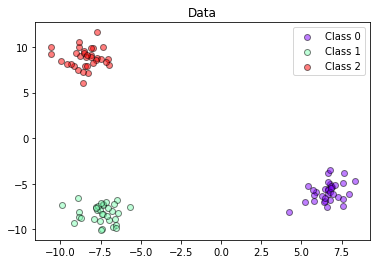

<Figure size 432x288 with 0 Axes>

In [2]:
# - візуалізація набору 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
X_blobs, y_blobs = make_blobs()

plt.figure()
y_unique = np.unique(y_blobs)
colors = cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
for this_y, color in zip(y_unique, colors):
    this_X = X_blobs[y_blobs == this_y]
    plt.scatter(
        this_X[:, 0],
        this_X[:, 1],
        c=color[np.newaxis, :],
        alpha=0.5,
        edgecolor="k",
        label="Class %s" % this_y,
    )
plt.legend(loc="best")
plt.title("Data")

plt.figure()



In [3]:
#надання цілого типу даних
df = df.astype({1:'int', 0: 'int' })
df.describe()


,0,1
count,400.000000,400.000000
mean,0.020000,3.475000
std,1.188753,2.602173
min,-2.000000,0.000000
25%,-1.000000,1.000000
50%,0.000000,3.000000
75%,1.000000,5.250000
max,3.000000,9.000000


In [4]:
#створення тестової та валідаційної виборки
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = \
    train_test_split(X, y_true,
                     test_size=0.20,
                     random_state=1)


In [5]:
#1 Моделi sklearn.svm.LinearSVC та SVC(kernel="linear") з лiнiйним ядром, встановити велике значення параметра С. При використаннi
#LinearSVC звернути увагу, що навчальнi данi мають бути попередньо масштабованi i центрованi.
from sklearn.svm import LinearSVC
Lin_SVC = LinearSVC(C=15).fit(X_train, Y_train)

d:\anaconda_\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [6]:
#accuracy_score для тестової виборки
from sklearn.metrics import accuracy_score
predict_test = Lin_SVC.predict(X_test)
accuracy_score(Y_test, predict_test)

0.975

In [7]:
#accuracy_score для валідаційної виборки
predict_train = Lin_SVC.predict(X_train)
accuracy_score(Y_train, predict_train)

0.996875

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

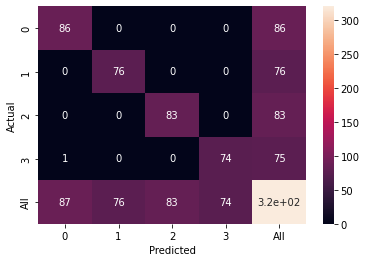

In [8]:
#1матриця неточностей
import seaborn as sn
df_1 = pd.concat((pd.Series(Y_train), pd.Series(predict_train)), axis='columns')

confusion_matrix = pd.crosstab(df_1[0], df_1[1], rownames=[
                               'Actual'], colnames=['Predicted'], margins=True)

sn.heatmap(confusion_matrix, annot=True)

In [9]:
#precision для тестових даних 
from sklearn.metrics import precision_score
precision_score(Y_test, predict_test, average = None)

array([0.875, 1.   , 1.   , 1.   ])

In [10]:
#precision для валідаційних
precision_score(Y_train, predict_train, average = None)

array([0.98850575, 1.        , 1.        , 1.        ])

In [11]:
#recall для валідаційних
from sklearn.metrics import recall_score
recall_score(Y_train, predict_train, average = None)

array([1.        , 1.        , 1.        , 0.98666667])

In [12]:
#recal для тестових
recall_score(Y_test, predict_test, average = None)

array([1.        , 1.        , 0.88235294, 1.        ])

In [13]:
#F1 score для валідаціних
from sklearn.metrics import f1_score
f1_score(Y_train, predict_train, average = None)

array([0.99421965, 1.        , 1.        , 0.99328859])

In [14]:
#F1 score для тестових
f1_score(Y_test, predict_test, average = None)

array([0.93333333, 1.        , 0.9375    , 1.        ])

In [15]:
#SVC(kernel="linear") з лiнiйним ядром
from sklearn.svm import SVC
SVC_k = SVC(kernel='linear').fit(X_train, Y_train)

In [16]:
predict = SVC_k.predict(X_test)
accuracy_score(Y_test, predict)

0.9875

In [17]:
#2. лінійне ядро та менше С
from sklearn.svm import LinearSVC
Lin_SVC = LinearSVC(C=1.5).fit(X_train, Y_train)

d:\anaconda_\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [18]:
#3 Моделi SVC(kernel="poly") з полiномiальними ядрами. Дослiдити
# рiзнi ступенi degree та гiперпараметр coef0 - управляє тим, наскiль-
# ки сильно полiноми високого ступеня впливають на модель порiв-
# няно з полiномами низького ступеня.
SVC_3 = SVC(kernel='poly', degree=3, coef0=0).fit(X_train, Y_train)

In [19]:
predict_3 = SVC_3.predict(X_test)   
accuracy_score(Y_test, predict_3)

1.0

In [20]:
SVC_3b = SVC(kernel='poly', degree=2, coef0=0.5).fit(X_train, Y_train)

In [21]:
predict_3b = SVC_3b.predict(X_test)
accuracy_score(Y_test, predict_3b)

0.9875

In [22]:
#4 Моделi SVC(kernel="rbf") з ядром "гаусiвська радiальна базисна
# функцiя". Розглянути рiзнi комбiнацiї гiперпараметрiв gamma i C,
# такi як: gamma=0.1 i C=0.01; gamma=0.1 i C=1; gamma=0.1 i C=100;
# gamma=10 i C=0.01; gamma=10 i C=1; gamma=10 i C=100.
# Збiльшення gamma призводить до стиснення дзвоноподiбної кривої,
# в результатi вплив кожного прикладу зменшується; границя рiшень
# бiльше звивається навколо окремих прикладiв. Невелике значення gamma робить границю рiшень бiльш гладкою. Гiперпараметр
# gamma дiє як регуляризатор: при перенавчаннi слiд зменшити значення gamma.
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

kombaine = SVC(kernel='rbf')
parameters = {'gamma': [0.1, 10],
              'C': [0.01, 1, 100]}

kombaine_gridsearch = GridSearchCV(
    kombaine, parameters, cv=7)


In [23]:
kombaine_gridsearch.fit(X_train, Y_train)

GridSearchCV(cv=7, estimator=SVC(),
             param_grid={'C': [0.01, 1, 100], 'gamma': [0.1, 10]})

In [24]:
print(
    f'Best score: {kombaine_gridsearch.best_score_}, Best parameters: {kombaine_gridsearch.best_params_}')


Best score: 1.0, Best parameters: {'C': 1, 'gamma': 0.1}


In [25]:
#5 Настроїти гiперпараметри С та degree за допомогою решiтчастого пошуку.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

grill = SVC()
param_grid = {'C': [0.01, 1, 100],
              'degree': [0.1, 10, 1]}

grill_gridsearch = GridSearchCV(grill, param_grid, cv=10)
grill_gridsearch.fit(X_train, Y_train)
print(
    f'Best score: {grill_gridsearch.best_score_}, Best parameters: {grill_gridsearch.best_params_}')


Best score: 1.0, Best parameters: {'C': 1, 'degree': 0.1}


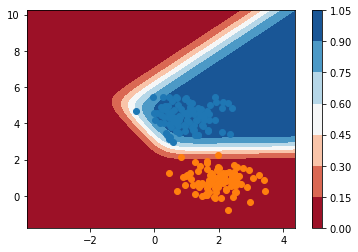

In [26]:
# візуалізація методу опорних векторів
from sklearn.linear_model import LogisticRegression


X, y = make_blobs(n_samples=400, centers=4,cluster_std=0.6, random_state = 0)
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

xx, yy = np.meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1,r2))

model = LogisticRegression()

model.fit(X, y)

yhat = model.predict_proba(grid)

yhat = yhat[:, 0]

zz = yhat.reshape(xx.shape)

c = plt.contourf(xx, yy, zz, cmap='RdBu')

plt.colorbar(c)

for class_value in range(2):
    row_ix = np.where(y == class_value)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

Висновки
В даній лабораторній роботі ми ознайомилися з методом опорних векторів, краще вивчили бібліотеки sklearn, pandas, matplotlib. Вивчили моделі SVC, SVC_Linear. Знайшли кращу комбінацію гiперпараметрiв gamma i C. Для набору даних make_blobs це - {'C': 1, 'gamma': 0.1}, для набору даних Malicious_and_Benign_Websites це - {'C': 1, 'gamma': 0.1}. Також навчилися за допомогою рішідчатого пошуку знаходити гіперпараметри С та degree. 
Також варто зазначити, що для обох дасатетів всі моделі працюють приблизно однаково з незначними відхиленнями, проте моделі без регуляризації працюють трохи краще. Для другого датасету моделі показують, в цілому, вищі результати, однак для них є характерним незначне перенавчання, що не спостерігається на першому датасеті. 

In [27]:
#scaled
sc = StandardScaler()
scaler = sc.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(max_iter=300, activation='relu', solver='adam', random_state=1)

In [29]:
#train first MLP
mlp_clf.fit(x_train_scaled, Y_train)

d:\anaconda_\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1)

In [30]:
y_pred = mlp_clf.predict(x_test_scaled)
print ('Accuracy: {:.2f}'.format(accuracy_score(Y_test, y_pred)))

Accuracy: 0.99


d:\anaconda_\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


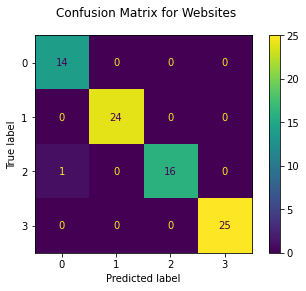

In [31]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(mlp_clf, x_test_scaled, Y_test, display_labels=mlp_clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Websites")
plt.show()

In [32]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      1.00      1.00        24
           2       1.00      0.94      0.97        17
           3       1.00      1.00      1.00        25

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.98        80
weighted avg       0.99      0.99      0.99        80



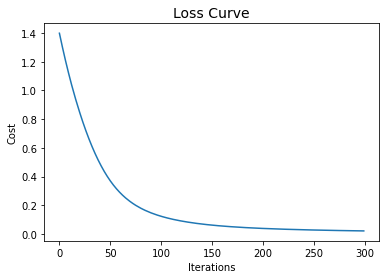

In [33]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Висновок
Одношарової моделі цілком достатньо, адже ми отримали найбільш близьке до 1 значення точності